In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


from finches.frontend import mpipi_frontend

In [3]:
from sparrow import Protein
from finches.forcefields.mPiPi import mPiPi_model
from finches import epsilon_calculation


## Protein-nucleic acid interaction example

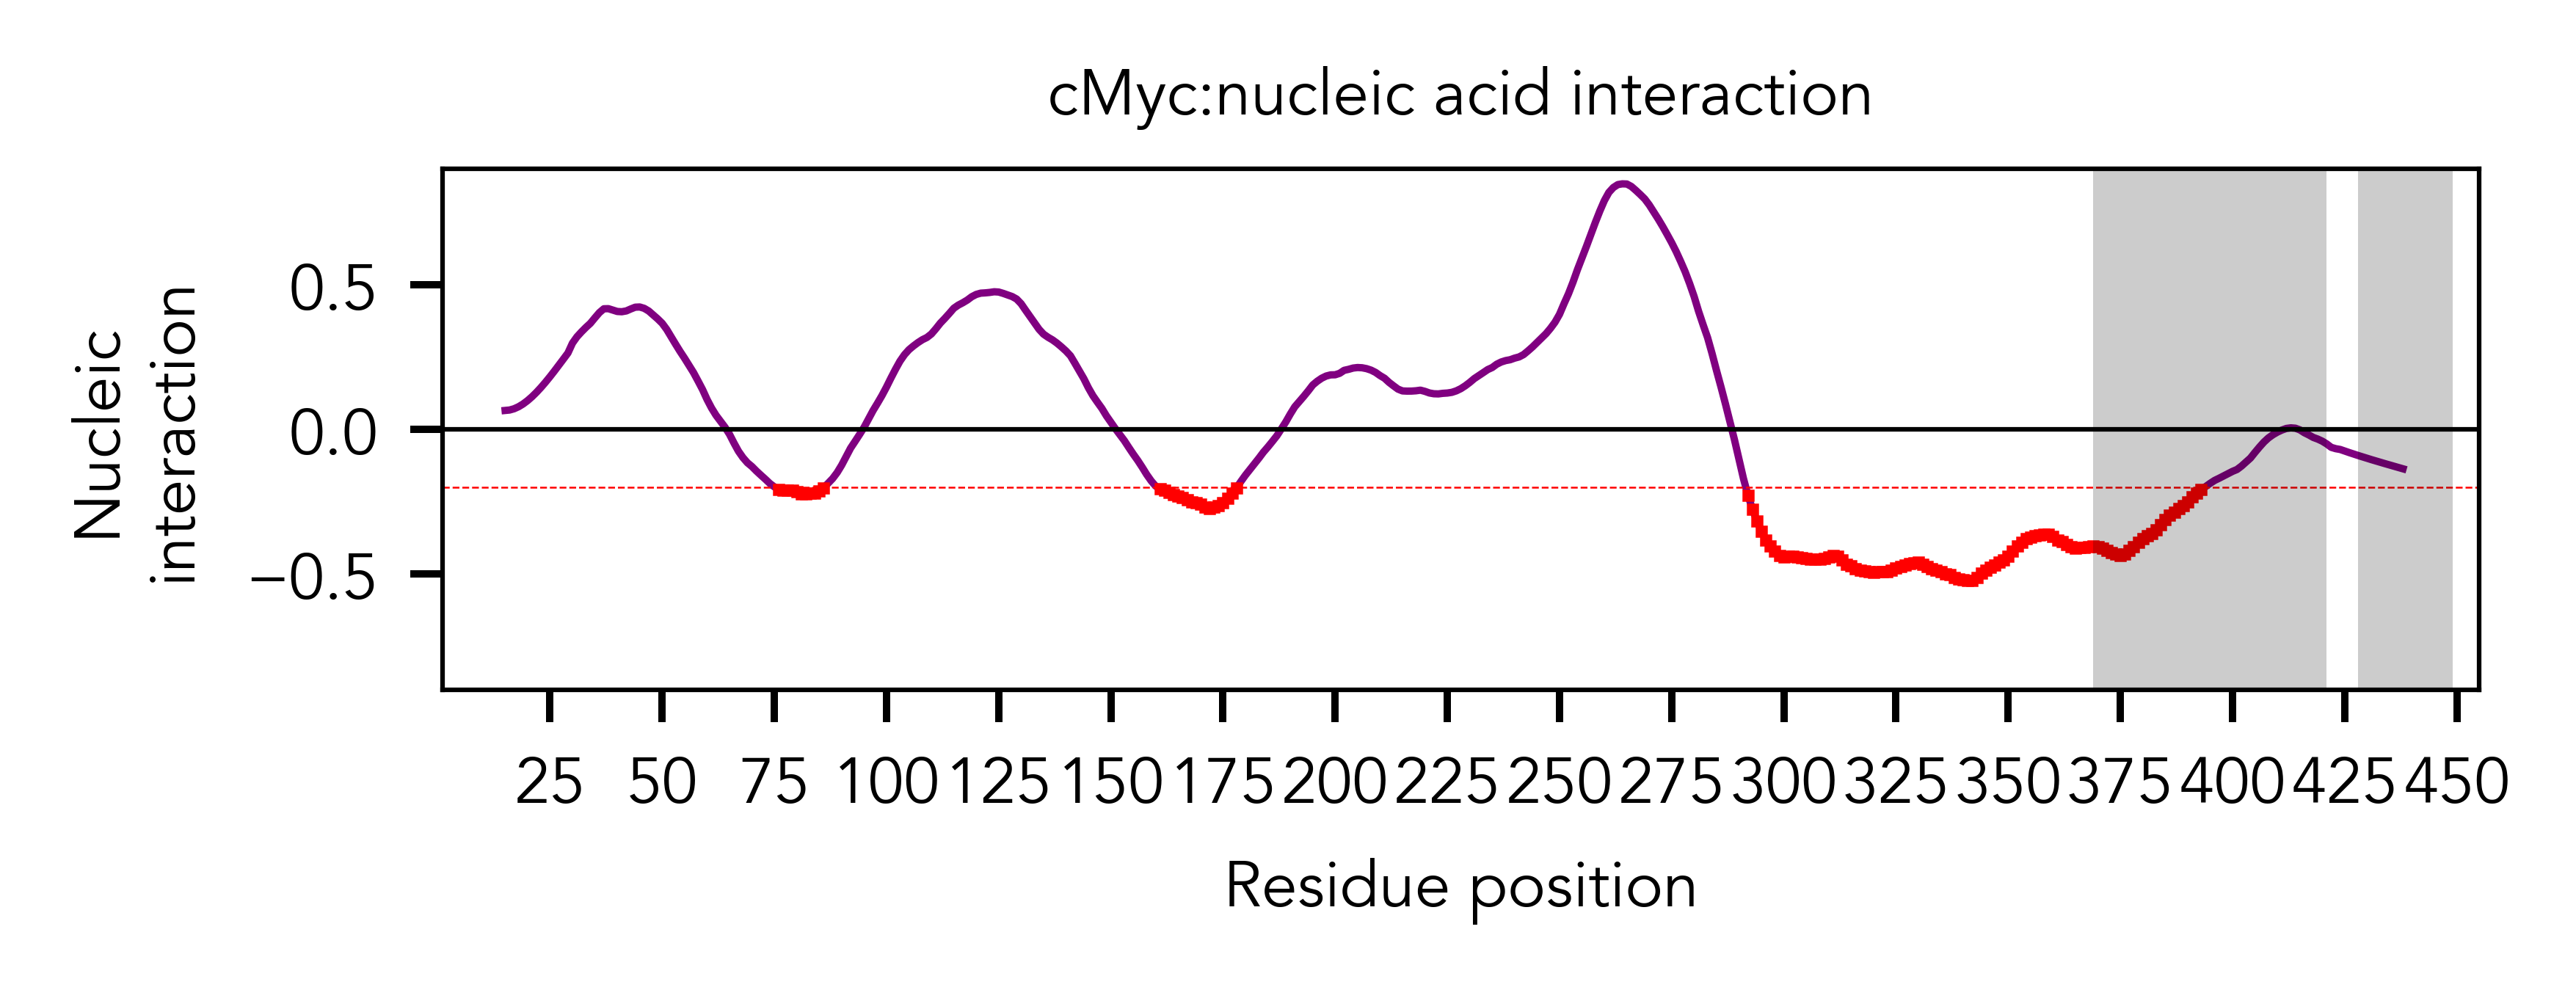

In [7]:
uid = 'P01106'
cMyc_seq = 'MDFFRVVENQQPPATMPLNVSFTNRNYDLDYDSVQPYFYCDEEENFYQQQQQSELQPPAPSEDIWKKFELLPTPPLSPSRRSGLCSPSYVAVTPFSLRGDNDGGGGSFSTADQLEMVTELLGGDMVNQSFICDPDDETFIKNIIIQDCMWSGFSAAAKLVSEKLASYQAARKDSGSPNPARGHSVCSTSSLYLQDLSAAASECIDPSVVFPYPLNDSSSPKSCASQDSSAFSPSSDSLLSSTESSPQGSPEPLVLHEETPPTTSSDSEEEQEDEEEIDVVSVEKRQAPGKRSESGSPSAGGHSKPPHSPLVLKRCHVSTHQHNYAAPPSTRKDYPAAKRVKLDSVRVLRQISNNRKCTSPRSSDTEENVKRRTHNVLERQRRNELKRSFFALRDQIPELENNEKAPKVVILKKATAYILSVQAEEQKLISEEDLLRKRREQLKHKLEQLRNSCA'

thresh = -0.2

[idx, vals] = mpipi_frontend.protein_nucleic_vector(cMyc_seq)
seq = cMyc_seq


fig = plt.figure(figsize=(4, 1.6), dpi=450)
ax = plt.gca()
plt.plot(idx,vals, linewidth=0.8, color='purple')


# manually aquired DBDs because metapredict struggles a bit with the boundaries here :-/
#	428-449
ax.axvspan(428, 449, linewidth=0, zorder=10, color='k', alpha=0.2)

# manually aquired DBDs because metapredict struggles a bit with the boundaries here :-/
# 369 421
ax.axvspan(369, 421, linewidth=0, zorder=10, color='k', alpha=0.2)

# hacky way to color positions on the curve below a threshold; -0.2 used here but there may be a more stringent/better
# one available?
for i, v in enumerate(vals):
    if v <= thresh:
        plt.plot(idx[i],v,'sr',ms=0.3)


# not sure this line buys as anything but shows where the threshold is...
ax.axhline(thresh, ls='--',color='r', linewidth=0.2)
ax.axhline(0, color='k',lw=0.5)
plt.ylim([-0.9,0.9])

# hacky way to get gene name but seems to work in general
plt.title('cMyc:nucleic acid interaction', fontsize=7)
plt.ylabel('Nucleic\ninteraction', fontsize=7)
plt.xlabel('Residue position', fontsize=7)
plt.xticks(np.arange(0,len(seq),25),fontsize=7)
plt.yticks(fontsize=7)
plt.xlim([1, len(seq)+1])

# ensure axis are on top
for spine in ax.spines.values():
    spine.set_zorder(30)

plt.tight_layout()